In [3]:
from sklearn import svm
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
dataset = pd.read_csv('data/server_data.csv', header=None)
dataset.head()

,0,1
0,13.047,14.741
1,13.409,13.763
2,14.196,15.853
3,14.915,16.174
4,13.577,14.043


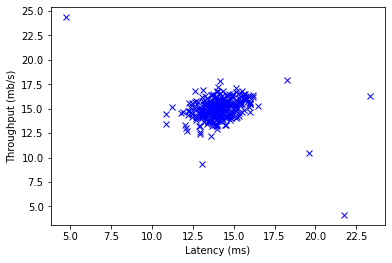

In [5]:
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(dataset.values[:,0],dataset.values[:,1],'bx')
plt.show()

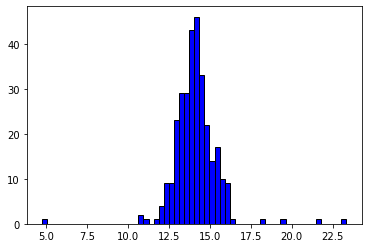

In [6]:
plt1 = plt.hist(dataset.values[:,0], color = 'blue', edgecolor = 'black',
         bins = 60)

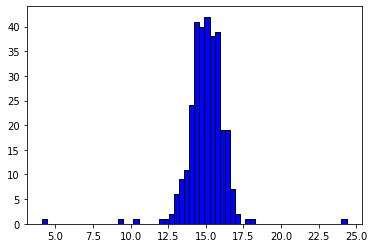

In [7]:
plt1 = plt.hist(dataset.values[:,1], color = 'blue', edgecolor = 'black',
         bins = 60)

In [96]:
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma='scale')
clf.fit(dataset.values)

OneClassSVM(nu=0.05)

In [97]:
pred = clf.predict(dataset.values)

In [98]:
normal = dataset.values[pred == 1]
abnormal = dataset.values[pred == -1]

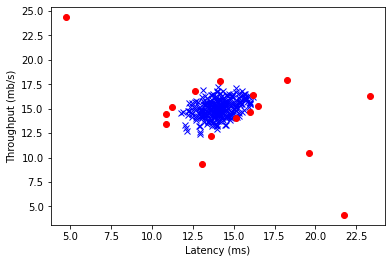

In [99]:
plt.figure()
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [100]:
scores = clf.score_samples(dataset.values)
scores[pred == -1]

array([2.18114491, 2.18066663, 1.99861186, 2.18112654, 2.06851359,
       2.18112656, 2.11574227, 2.18095815, 2.08776211, 2.10580818,
       1.15581984, 1.00001353, 1.00062939, 1.0007045 , 1.20315557,
       1.        ])

In [101]:
scores = clf.score_samples(dataset.values)
normal = dataset.values[scores >= 1.95]
abnormal = dataset.values[scores < 1.95]

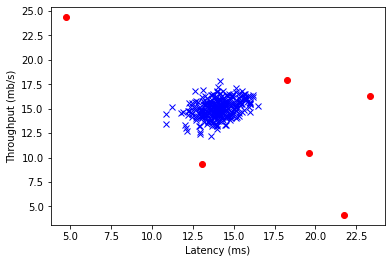

In [102]:
plt.figure()
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()